# Vehicle Data Overview

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os.path
import re

GPS_from_UTC = (datetime(1980,1,6) - datetime(1970,1,1)).total_seconds()
GPS_parse_date = lambda date: datetime.utcfromtimestamp(date + GPS_from_UTC)
GPS_parse_dates = lambda dates: [GPS_parse_date(date) for date in dates]

all_dir = '../../Vehicle Data/November2016/2016.11.1?/RCM00001/*_Complete_Log/'
first_best_dir = '../../Vehicle Data/November2016/2016.11.11/RCM00001/16.36.06_Complete_Log/'

colnames = ['filename', 'fields', 'type', 'min', 'max', 'first 3']
df = pd.DataFrame(columns=colnames)
for file in glob.glob(first_best_dir + '*'):
    df_file = pd.read_csv(file)
    filename = os.path.basename(file)
    m = re.search('([^\d]+)\d*\.csv', filename)
    file_content = m.group(1)
    row = pd.DataFrame(
        list(zip(
            [file_content] * len(df_file.columns),
            df_file.columns,
            [type(x) for x in df_file.ix[0,:]],
            [df_file[x].min() for x in df_file.columns],
            [df_file[x].max() for x in df_file.columns],
            [df_file[x].unique() for x in df_file.columns],

        )),
        columns=colnames
    )
    df = df.append(row)
# df[df['filename'] == 'LHDMachineData']
df[df['filename'] == 'LHDMinetecRangeData']
# df # or all

,filename,fields,type,min,max,first 3
0,LHDMinetecRangeData,OriginationTime,<class 'numpy.float64'>,1.16288e+09,1.16288e+09,"[1162881383.45, 1162881383.45, 1162881383.45, ..."
1,LHDMinetecRangeData,TransmissionTime,<class 'numpy.float64'>,1.16288e+09,1.16288e+09,"[1162881383.45, 1162881383.45, 1162881383.45, ..."
2,LHDMinetecRangeData,txSequenceNumber,<class 'numpy.float64'>,273884,302036,"[273884, 273885, 273886, 273887, 273888, 27388..."
3,LHDMinetecRangeData,loggerSequenceNumber,<class 'numpy.float64'>,0,0,[0]
4,LHDMinetecRangeData,loggedTime,<class 'numpy.float64'>,0,0,[0.0]
5,LHDMinetecRangeData,Tag 1 ID,<class 'numpy.float64'>,46544,46544,[46544]
6,LHDMinetecRangeData,Tag 2 ID,<class 'numpy.float64'>,35,63855,"[36216, 42484, 57622, 20719, 25190, 11386, 682..."
7,LHDMinetecRangeData,Range (cm?),<class 'numpy.float64'>,95,29615,"[2735, 2028, 6568, 498, 2779, 1977, 6640, 278,..."
8,LHDMinetecRangeData,Type,<class 'numpy.float64'>,5,9,"[5, 9]"


## Column overview
* CameraImage
  * _no camera images so no real use_
  * times **OriginationTime**, **TransmissionTime**, **Timestamp**, **LocalTimestamp**
  * transmission **txSequenceNumber**
  * **loggerSequenceNumbe** 0
  * **loggedTIme** [0.0]
  * CameraId [2, 3, 1]
  * video? **FrameNumber**, **Compression**, **Width** [1280], **Height** [960]
  * transmission **txSequenceNumber**, **loggerSequenceNumber**
* LHDBucketData
  * _maybe see if there is any corellation between angles and effective runs but presumably this is of no use_
  * times **OriginationTime**, **TransmissionTIme** as GPS times so 1162881383.38 is unix time 1478846166 is Nov 11, 2016 06:36:06 UTC
  * **txSequenceNumber** [256707, 256708, 256709, 256710, 256711, 25671...
  * **loggerSequenceNumber** always [0]
  * **loggedTime** always [0.0]
  * **Lift Sensor Health** always [OK]
  * **Lift Angle (deg)** between 68.29 and 102.14 [75.37, 75.33, 75.35, 75.43, 75.47, 75.49, 75....
  * **Tilt Sensor Health** always [OK]
  * **Tilt Angle (deg)** [52.53, 52.51, 52.52, 52.48, 52.5, 52.66, 52.8...
* LHDHydraulicData
  * _speed and related actions. Are there any anomolies in direction or park break? what is the importance of Torque converter speed? is there anything from brake oil pressure? otherwise ground speed is all there is to it? maybe a map of all the variables for a "run" to see how they interact?_
  * times **OriginationTime**, **TransmissionTime** as GPS
  * **txSequenceNumber** from 256707 to 281775 [256707, 256708, 256709, 256710, 256711, 25671...
  * **loggerSequenceNumber** alwyas [0]
  * **loggedTime** always [0.0]
  * **Left STIC Pilot Sensor Health** always [OK]
  * **Left STIC Pilot Pressure (kPa)** between 0 and 2370 [178, 157, 168, 140, 130, 122, 121, 124, 127, ...
  * **Right STIC Pilot Sensor Health** always [OK]
  * **Left Head / Right Rod Sensor Health** [OK]
  * **Left Head / Right Rod Pressure (kPa)** 0-20059 [2032, 2236, 2324, 2440, 2575, 2664, 2673, 259...
  * **Right Head / Left Rod Sensor Health** [OK]
  * **Right Head / Left Rod Pressure (kPa)** 0-21278 [1979, 1764, 1715, 1656, 1441, 1392, 1363, 142...
* LHDMachineData
  * times **OriginationTime**, **TransmissionTime**
  * **txSequenceNumber** 16688-18318 [16688, 16689, 16690, 16691, 16692, 16693, 166...
  * **loggerSequenceNumber**[0]
  * **loggedTime** [0.0]
  * **CDL Connection Health** [0]
  * **Throttle Position (%)** 0-100 [99.6, 58.4, 40.4, 28.0, 56.0, 80.0, 67.6, 96....
  * **Engine Speed (rpm)** 658.5-2208 [1874.0, 1968.5, 1931.5, 1494.0, 1159.5, 1080....
  * **Desired Engine Speed (rpm)** 800-2120 [2120.0, 1560.0, 1261.0, 1030.0, 1604.0, 2043....
  * **Boost Pressure (kPa)** 2.5-129.5 [119.0, 123.0, 93.0, 44.5, 25.5, 17.0, 27.0, 4...
  * **Engine Load Factor (%)** 0-100 [100, 77, 0, 41, 70, 51, 81, 95, 71, 25, 21, 4...
  * **Fuel Consumption Rate (l/h)** 0-70.8 [25.9, 24.6, 0.0, 43.1, 28.15, 15.3, 29.2, 25....
  * **Ground Speed (mph)** 0-15.5 [4.5, 5.0, 2.0, 0.0, 0.5, 3.0, 3.5, 4.0, 6.0, ...
  * **Transmission Output Speed (rpm)** 0-1499 [443, 534, 462, 46, 58, 0, 86, 244, 325, 381, ...
  * **Lockup Clutch Current (%)** 0-80 [28.6, 80.0, 0.0, 40.8, 55.7, 45.1, 27.7, 23.9...
  * **Neutralize Switch Status** [Run, Neutral]
  * **Direction Switch Position Status** [Forward, Neutral, Reverse, Err-Unknown]
  * **Ride Control Switch Status** always [Auto]
  * **Transmission Switch Status** [Auto 4]
  * **Park Brake Switch Status** [Off, On]
  * **Down Shift Switch Status** [Off, On]
  * **Up Shift Switch Status** [Off, On]
  * **Lockup Clutch Enable Switch Status** [On]
  * **Torque Converter Speed (rpm)** 0-2302 [1602, 1853, 2109, 1651, 1258, 934, 1374, 798,...
  * **Ground Speed and Direction (kph)** [0]
  * **Shift Lever Position Status** [FaultFNRP20]
  * **Actual Gear Status** [F2, N2, R2, R1, R3, R4, N4, N3, N1, F1, F3, F4]
  * **Reverse Steering Solenoid Status** [Err-Unknown]
  * **Park Brake Status** [Off, On]
  * **Service Brake Status** [Released, Depressed]
  * **Auto Retard Mode Status** [Off, Protective]
  * **Acceleration Pedal Status** [Depressed, Released]
  * **Front Service Brake Oil Pressure (kPa)** 0-5331 [0, 4, 383, 2725, 2421, 1579, 205, 188, 106, 1...
  * **Rear Service Brake Oil Pressure (kPa)** 0-5456 [0, 5, 408, 2764, 2606, 1757, 236, 346, 127, 1...
  * **Hydraulic Oil Temperature (degC)** 79-87 [81, 80, 82, 83, 84, 85, 86, 87, 79]
  * **Fuel Gauge (%)** 69-93 [80, 83, 87, 88, 86, 85, 84, 81, 76, 79, 77, 7...
  * **System Voltage (volts)** 27.5-28.4 [28.3, 28.2, 28.4, 28.1, 27.7, 28.0, 27.5, 27....
* LHDMinetecRangeData
  * _tag 2 ID relates to a map with the ability to trilatirate based on that and Range_
  * times **OriginationTime**, **TransmissionTime**
  * **txSequenceNumber** 273884-302036 [273884, 273885, 273886, 273887, 273888, 27388...
  * **loggerSequenceNumber** [0]
  * **loggedTime** [0.0]
  * **Tag 1 ID** [46544]
  * **Tag 2 ID** 35-63855 [36216, 42484, 57622, 20719, 25190, 11386, 682...
  * **Range (cm?)** 95-29615 [2735, 2028, 6568, 498, 2779, 1977, 6640, 278,...
  * **Type** [5, 9]

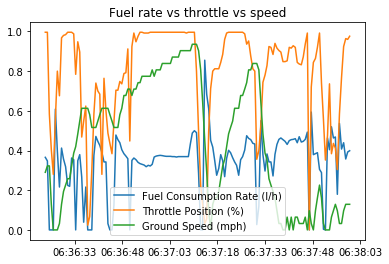

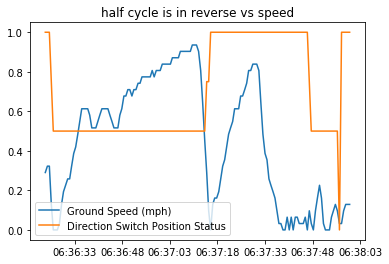

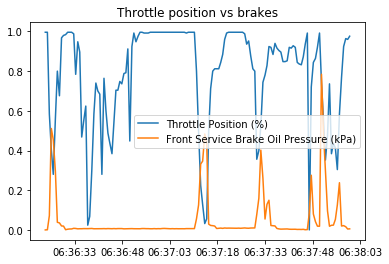

In [463]:
# first best file
df = pd.read_csv(
    glob.glob(first_best_dir + 'LHDMachineData*')[0], # first best file
#     index_col=['OriginationTime'],                        # TODO does not work with parsing later
#     parse_dates=['OriginationTime', 'TransmissionTime'],  # TODO problem with parser?
#     date_parser=GPS_parse_dates
)

#convert to date time from GPS time stamp
df['OriginationTime'] = df['OriginationTime'].apply(GPS_parse_date)
df['TransmissionTime'] = df['TransmissionTime'].apply(GPS_parse_date)

# time as index
df = df.set_index('OriginationTime')

# drop some non changing columns
df.drop(df.columns[[1,2,3,4]], axis=1, inplace=True)

# convert states to numeric
df['Neutralize Switch Status'] = df['Neutralize Switch Status'].apply(lambda x: 1 if (x == 'Run') else 0)

switcher = {
    'Forward': 1,
    'Neutral': 0,
    'Reverse': -1,
    'Err-Unknown': -3
}
df['Direction Switch Position Status'] = df['Direction Switch Position Status'].apply(lambda x: switcher.get(x))

on_off_switcher = { 'Off': 0, 'On': 1 }
for on_off_field in [
    'Park Brake Switch Status',
    'Down Shift Switch Status',
    'Up Shift Switch Status',
    'Park Brake Status'
]:
    df[on_off_field] = df[on_off_field].apply(lambda x: on_off_switcher.get(x))
    
gear_switcher = { 'R4': -40, 'R3': -30, 'R2': -20, 'R1': -10,
                'N1': -2, 'N2': 0, 'N3': 2, 'N4': 4,
                'F1': 10, 'F2': 20, 'F3': 30, 'F4': 40}
df['Actual Gear Status'] = df['Actual Gear Status'].apply(lambda x: gear_switcher.get(x))

field = 'Service Brake Status'
df[field] = df[field].apply(lambda x: 1 if (x == 'Released') else 0)
field = 'Auto Retard Mode Status'
df[field] = df[field].apply(lambda x: 1 if (x == 'Protective') else 0)
field = 'Acceleration Pedal Status'
df[field] = df[field].apply(lambda x: 1 if (x == 'Released') else 0)

# columns of interest
colnames = [
    # throttle related
#     'Throttle Position (%)',                   # 0-100
#     'Engine Speed (rpm)',                      # 658.5-2208
#     'Desired Engine Speed (rpm)',              # 800-2120
#     'Boost Pressure (kPa)',                    # 2.5-129.5
#     'Engine Load Factor (%)',                  # 0-100
#     'Fuel Consumption Rate (l/h)',             # 0-70.8
    
    # next 2 opposite to throttle position
#     'Front Service Brake Oil Pressure (kPa)',  # 0-5331
#     'Rear Service Brake Oil Pressure (kPa)',   # 0-5456

    # speed
#     'Ground Speed (mph)',                      # 0-15.5
#     'Torque Converter Speed (rpm)',            # 0-2302
#     'Transmission Output Speed (rpm)',         # 0-1499
#     'Lockup Clutch Current (%)',               # 0-80
#     'Actual Gear Status',                      # [F2, N2, R2, R1, R3, R4, N4, N3, N1, F1, F3, F4]
    
    # Run for acceleration, Neutral for slowwing
#     'Neutralize Switch Status',                # [Run, Neutral]

    # shows half the cycle in reverse
#     'Direction Switch Position Status',        # [Forward, Neutral, Reverse, Err-Unknown]

    # brake presses
#     'Service Brake Status',                    # [Released, Depressed]
    
    # Acceleration presses
#     'Acceleration Pedal Status',               # [Depressed, Released]
    
    # BORING
    # just on key accel and deccl
#     'Down Shift Switch Status',                # [Off, On]
#     'Up Shift Switch Status',                  # [Off, On]
    # mostly nothing
#     'Auto Retard Mode Status',                 # [Off, Protective]
#     'Park Brake Status',                       # [Off, On]
#     'Park Brake Switch Status',                # [Off, On]
#     'Hydraulic Oil Temperature (degC)',        # 79-87
#     'Fuel Gauge (%)',                          # 69-93
#     'System Voltage (volts)',
]
# relative plot not useful
# df[colnames]['2016-11-11 06:35' : '2016-11-11 06:37'].plot()

from datetime import timedelta
from sklearn import preprocessing

def plot_normalized_for(df, title, colnames, from_time, to_time=None, normalize=True):
    if to_time == None:
        to_time = pd.to_datetime(from_time) + timedelta(minutes = 5)
    x = df[colnames].dropna()
    df_index = df.dropna().index
    min_max_scaler = preprocessing.MinMaxScaler()
    if normalize:
        x_scaled = min_max_scaler.fit_transform(x)
    else:
        x_scaled = x
    df = pd.DataFrame(x_scaled, columns=colnames, index=df_index)
    plt.plot(df[from_time : to_time])
    plt.title(title)
    plt.legend(labels=colnames)
    plt.show()

plot_normalized_for(df, 'Fuel rate vs throttle vs speed',
                    ['Fuel Consumption Rate (l/h)', 'Throttle Position (%)', 'Ground Speed (mph)'],
                    '2016-11-11 06:35',
                    '2016-11-11 06:37'
                   )

plot_normalized_for(df, 'half cycle is in reverse vs speed',
                    ['Ground Speed (mph)', 'Direction Switch Position Status'],
                    '2016-11-11 06:35',
                    '2016-11-11 06:37'
                   )

plot_normalized_for(df, 'Throttle position vs brakes',
                    ['Throttle Position (%)', 'Front Service Brake Oil Pressure (kPa)'],
                    '2016-11-11 06:35',
                    '2016-11-11 06:37'
                   )

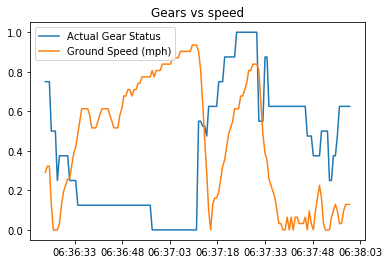

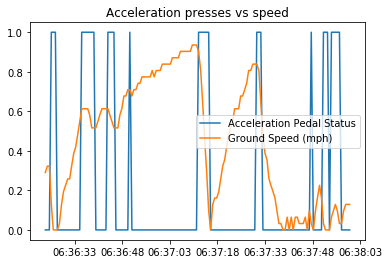

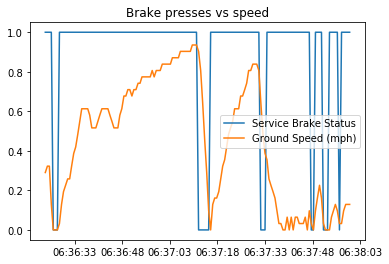

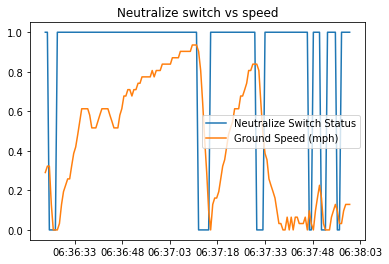

In [282]:
plot_normalized_for(df, 'Gears vs speed',
                    ['Actual Gear Status', 'Ground Speed (mph)'],
                    '2016-11-11 06:35',
                    '2016-11-11 06:37'
                   )

plot_normalized_for(df, 'Acceleration presses vs speed',
                    ['Acceleration Pedal Status', 'Ground Speed (mph)'],
                    '2016-11-11 06:35',
                    '2016-11-11 06:37'
                   )

plot_normalized_for(df, 'Brake presses vs speed',
                    ['Service Brake Status', 'Ground Speed (mph)'],
                    '2016-11-11 06:35',
                    '2016-11-11 06:37'
                   )

plot_normalized_for(df, 'Neutralize switch vs speed',
                    ['Neutralize Switch Status', 'Ground Speed (mph)'],
                    '2016-11-11 06:35',
                    '2016-11-11 06:37'
                   )

In [145]:
# Reading full files took 75 seconds and appending blew this out to 589 seconds (2 fields)
# limiting the columns brings this down to seconds

df_md = pd.DataFrame()

start_time = datetime.now()
print('Starting: ' + start_time.isoformat(' '))

file_type = 'LHDMachineData' # 3 sec load: 704,779
colnames = ['OriginationTime', 'Throttle Position (%)', 'Ground Speed (mph)', 'Direction Switch Position Status']
for name in glob.glob(all_dir + file_type + '*'):
    dfx = pd.read_csv(name, usecols=colnames)
    dfx['OriginationTime'] = dfx['OriginationTime'].apply(GPS_parse_date)
    df_md = df_md.append(dfx)

df_md = df_md.set_index('OriginationTime')
print('loaded ' + file_type + ' in ' + str(datetime.now() - start_time) + ' with a shape: ' + str(df_md.shape))
last_time = datetime.now()

df_bd = pd.DataFrame()
file_type = 'LHDBucketData' # 33 sec load: 10,838,622
colnames = ['OriginationTime', 'Lift Angle (deg)', 'Tilt Angle (deg)']
for name in glob.glob(all_dir + file_type + '*'):
    dfx = pd.read_csv(name, usecols=colnames)
    dfx['OriginationTime'] = dfx['OriginationTime'].apply(GPS_parse_date)
    df_bd = df_bd.append(dfx)

df_bd = df_bd.set_index('OriginationTime')
print('loaded ' + file_type + ' in ' + str(datetime.now() - last_time) + ' with a shape: ' + str(df_bd.shape))
last_time = datetime.now()

# df_rd = pd.DataFrame()
# file_type = 'LHDMinetecRangeData' # 38 sec load: 12,092,423
# colnames = ['OriginationTime', 'txSequenceNumber', 'Tag 2 ID', 'Range (cm?)']
# for name in glob.glob(all_dir + file_type + '*'):
#     dfx = pd.read_csv(name, usecols=colnames)
#     dfx['OriginationTime'] = dfx['OriginationTime'].apply(GPS_parse_date)
#     df_rd = df_rd.append(dfx)
# print('loaded ' + file_type + ' in ' + str(datetime.now() - last_time) + ' with a shape: ' + str(df_rd.shape))
# last_time = datetime.now()

df_bd.head(3)
df_rd.head(3)

Starting: 2017-03-27 22:15:54.164062
loaded LHDMachineData in 0:00:03.555158 with a shape: (704779, 3)
loaded LHDBucketData in 0:00:31.596954 with a shape: (10838622, 2)


,35,2630,6820,9858,11386,20719,22002,25169,25190,27021,...,36216,40871,42484,46335,47502,49136,53855,54000,57622,63855
OriginationTime,,,,,,,,,,,,,,,,,,,,,
2016-11-11 06:36:23,NaN,NaN,NaN,NaN,NaN,498,NaN,NaN,5353,NaN,...,2735,NaN,2028,NaN,NaN,NaN,NaN,NaN,6568,NaN
2016-11-11 06:36:24,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,5243,NaN,...,2857,NaN,1890,NaN,NaN,NaN,NaN,NaN,6341,NaN
2016-11-11 06:36:25,NaN,NaN,NaN,NaN,NaN,292,NaN,NaN,5070,NaN,...,3116,NaN,1701,NaN,NaN,NaN,NaN,NaN,6657,NaN


In [5]:
# Resample do not re-run without re-running previous
switcher = {
    'Forward': 1,
    'Neutral': 0,
    'Reverse': -1,
    'Err-Unknown': -3
}
df_md['Direction Switch Position Status'] = df_md['Direction Switch Position Status'].apply(lambda x: switcher.get(x))

df_md_sec = df_md.resample('S') # resample down to second
df_bd_sec = df_bd.resample('S')
# .agg({'col 1': np.sum, 'col 2': np.mean}) # can choose different resample methods, maybe max?

df_all = df_md_sec.join(df_bd_sec)
df_all.head(3)

,Throttle Position (%),Ground Speed (mph),Direction Switch Position Status,Lift Angle (deg),Tilt Angle (deg)
OriginationTime,,,,,
2016-11-11 06:36:23,99.6,4.5,1,75.45750,53.802500
2016-11-11 06:36:24,79.0,5.0,1,75.32375,62.859583
2016-11-11 06:36:25,40.4,2.0,0,75.11250,84.690000


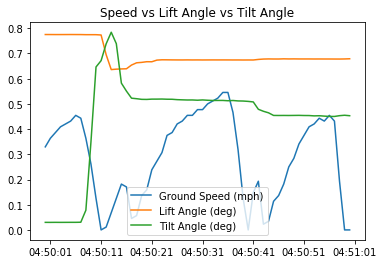

In [285]:
plot_normalized_for(df_all, 'Speed vs Lift Angle vs Tilt Angle',
                    ['Ground Speed (mph)', 'Lift Angle (deg)', 'Tilt Angle (deg)'],
                    '2016-11-12 04:50', # TODO how to pass [from : to] list slice?
                    '2016-11-12 05:00'
                   )

## Merge in the bogger data

In [483]:
bogcols = [
    'TippleName',
    'DrawPoint',
    'StartDateTime',
    'EndDateTime',
    'Tonnage',
    'Operator'
]
df_bog = pd.read_csv(
    "../../Orb/BoggerCycle_LD118.csv",
    usecols=bogcols,
    parse_dates=['StartDateTime', 'EndDateTime']
)
# create Journey field
df_bog['Journey'] = df_bog['TippleName'] + ':' + df_bog['DrawPoint']

# create time delta field
# TODO could these be generated on import with below?
#   parse_dates={'TimeTaken': ['EndDateTime', 'StartDateTime']}
#   date_parser=Parse_as_difference # custom parser function
df_bog['TimeTaken'] = df_bog['EndDateTime'] - df_bog['StartDateTime']
df_bog['TimeTakenSec'] = df_bog['TimeTaken'].apply(lambda x: x/np.timedelta64(1, 's'))

df_bog = df_bog.set_index('StartDateTime')

df_all_bog = df_all.join(df_bog, how='outer') # TODO on between start and end
df_all_bog.ffill(inplace=True) # TODO this forward fills beyond EndDateTime, is there a condition?

df_all_bog['2016-11-11 06:35:40' : '2016-11-11 06:38:55'].head(3)

,Throttle Position (%),Ground Speed (mph),Direction Switch Position Status,Lift Angle (deg),Tilt Angle (deg),TippleName,DrawPoint,EndDateTime,Tonnage,Operator,Journey,TimeTaken,TimeTakenSec
2016-11-11 06:35:41,NaN,NaN,NaN,NaN,NaN,DP102,108W04,2016-11-11 06:38:50,19.5,22745ee2941e905f609467eaa08defb3abb1d3b647628c...,DP102:108W04,00:03:09,189
2016-11-11 06:36:23,99.6,4.5,1,75.45750,53.802500,DP102,108W04,2016-11-11 06:38:50,19.5,22745ee2941e905f609467eaa08defb3abb1d3b647628c...,DP102:108W04,00:03:09,189
2016-11-11 06:36:24,79.0,5.0,1,75.32375,62.859583,DP102,108W04,2016-11-11 06:38:50,19.5,22745ee2941e905f609467eaa08defb3abb1d3b647628c...,DP102:108W04,00:03:09,189


A first representation of speed with various tonnage values so indicating over various cycles.

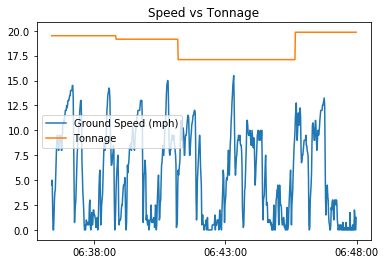

In [395]:
plot_normalized_for(df_all_bog, 'Speed vs Tonnage',
                    ['Ground Speed (mph)', 'Tonnage'],
                    '2016-11-11 06:35', # TODO how to pass [from : to] list slice?
                    '2016-11-11 06:47',
                    False
                   )

Looking at the most represented **Journey** and the most represented **Operator** for the associated journey

In [519]:
df_all_bog['Journey'].value_counts()
# DP102:108W07      43284
# DP102:108E05      42763
# DP102:108W04      41945
# DP102:108W08      37749
# DP102:108W03      33514
df_all_bog[df_all_bog['Journey'] == 'DP102:108W07']['Operator'].value_counts()
# 094c68186f33332bfeb662f33d65a41a60720296fba85eb006294319a0d35226    10124
# 67d51998776df6c4765ebe103d5e4ab8c62f2ae1c1377da0862caacd6411b825     6296
# 8697ed3c178553472fcdd09939e91bd61190211e6bb8ee9c56e99d058bc5a205     5561
# 5317550a53952273b1d7d37694877e514c49abf089871d5945f8674b966bcd80      911

df_journey_operator = df_all_bog[
    (df_all_bog['Journey'] == 'DP102:108W07') &
#     (df_all_bog['Journey'] == 'DP102:108W03') &
    (df_all_bog['Operator'] == '22745ee2941e905f609467eaa08defb3abb1d3b647628cc140d528669d330671')
]

There seems some anomoly in this run. It is 8 min long which is 3 times longer then others and there are some common characteristics of **Tilt Angle (deg)** which presumably may mean multiple cycles? or other work?

Have added the **direction switch position status** in which seems in conclusive, lots of forward back?

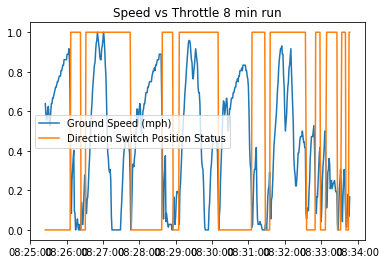

In [520]:
plot_normalized_for(df_journey_operator, 'Speed vs Throttle 8 min run',
                    [
                        'Ground Speed (mph)',
#                         'Throttle Position (%)',
                        'Direction Switch Position Status',
#                         'Tilt Angle (deg)'
                    ],
                    '2016-11-11 08:25:25',
                    '2016-11-11 08:33:47'
                   )


typical 3 minute run although the graph does not look as expected, did not have the ramp and tilt profile as above.

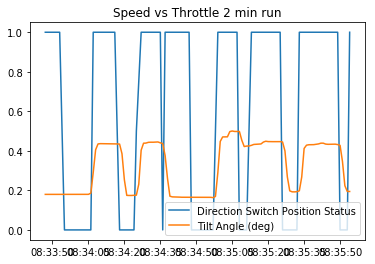

In [521]:
plot_normalized_for(df_journey_operator, 'Speed vs Throttle 2 min run',
                    [
#                         'Ground Speed (mph)', 
#                         'Throttle Position (%)',
                        'Direction Switch Position Status',
                        'Tilt Angle (deg)'
                    ],
                    '2016-11-11 08:33:47',
                    '2016-11-11 08:35:54'
                   )

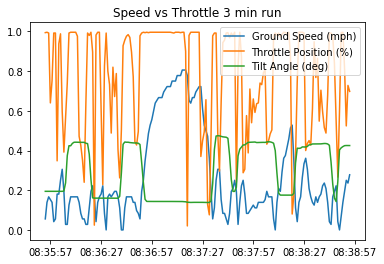

In [522]:
plot_normalized_for(df_journey_operator, 'Speed vs Throttle 3 min run',
                    ['Ground Speed (mph)', 'Throttle Position (%)', 'Tilt Angle (deg)'],
                    '2016-11-11 08:35:54',
                    '2016-11-11 08:38:54'
                   )

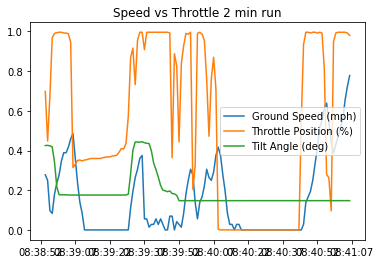

In [523]:
plot_normalized_for(df_journey_operator, 'Speed vs Throttle 2 min run',
                    ['Ground Speed (mph)', 'Throttle Position (%)', 'Tilt Angle (deg)'],
                    '2016-11-11 08:38:54',
                    '2016-11-11 08:41:06'
                   )

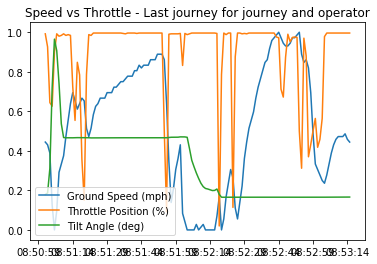

,Throttle Position (%),Ground Speed (mph),Direction Switch Position Status,Lift Angle (deg),Tilt Angle (deg),TippleName,DrawPoint,EndDateTime,Tonnage,Operator,Journey,TimeTaken,TimeTakenSec
2016-11-11 08:51:02,99.2,8.00,1,84.409600,51.722000,DP102,108W07,2016-11-11 08:53:15,18.45,22745ee2941e905f609467eaa08defb3abb1d3b647628c...,DP102:108W07,00:02:13,133
2016-11-11 08:51:03,92.6,7.75,1,78.349167,52.310833,DP102,108W07,2016-11-11 08:53:15,18.45,22745ee2941e905f609467eaa08defb3abb1d3b647628c...,DP102:108W07,00:02:13,133
2016-11-11 08:51:04,64.4,7.00,1,74.777083,61.100000,DP102,108W07,2016-11-11 08:53:15,18.45,22745ee2941e905f609467eaa08defb3abb1d3b647628c...,DP102:108W07,00:02:13,133


In [531]:
plot_normalized_for(df_journey_operator, 'Speed vs Throttle - Last journey for journey and operator',
                    ['Ground Speed (mph)', 'Throttle Position (%)', 'Tilt Angle (deg)'],
                    '2016-11-11 08:51:02',
                    '2016-11-11 08:53:15'
                   )
df_journey_operator['2016-11-11 08:51:02' : '2016-11-11 08:53:15'].head(3)

New **Operator** for same **Journey** as looked at above

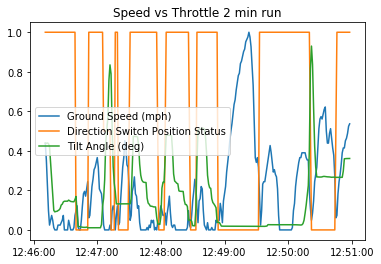

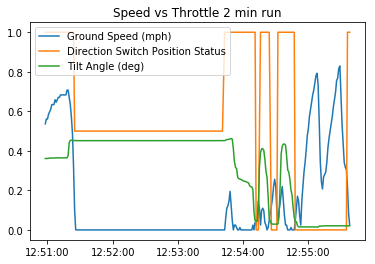

,Throttle Position (%),Ground Speed (mph),Direction Switch Position Status,Lift Angle (deg),Tilt Angle (deg),TippleName,DrawPoint,EndDateTime,Tonnage,Operator,Journey,TimeTaken,TimeTakenSec
2016-11-12 12:50:58,99.6,11.0,1,94.660833,66.332083,DP102,108W07,2016-11-12 12:55:38,18.35,094c68186f33332bfeb662f33d65a41a60720296fba85e...,DP102:108W07,00:04:40,280
2016-11-12 12:50:59,99.6,11.5,1,94.663333,66.328333,DP102,108W07,2016-11-12 12:55:38,18.35,094c68186f33332bfeb662f33d65a41a60720296fba85e...,DP102:108W07,00:04:40,280
2016-11-12 12:51:00,99.6,11.5,1,94.659600,66.349600,DP102,108W07,2016-11-12 12:55:38,18.35,094c68186f33332bfeb662f33d65a41a60720296fba85e...,DP102:108W07,00:04:40,280


In [539]:
df_DP102_108W07_094c6 = df_all_bog[
    (df_all_bog['Journey'] == 'DP102:108W07') &
    (df_all_bog['Operator'] == '094c68186f33332bfeb662f33d65a41a60720296fba85eb006294319a0d35226')
]
plot_normalized_for(df_DP102_108W07_094c6, 'Speed vs Throttle 2 min run',
                    [
                        'Ground Speed (mph)', 
#                         'Throttle Position (%)',
                        'Direction Switch Position Status',
                        'Tilt Angle (deg)'
                    ],
                    '2016-11-12 12:46:11',
                    '2016-11-12 12:50:58'
                   )
plot_normalized_for(df_DP102_108W07_094c6, 'Speed vs Throttle 2 min run',
                    [
                        'Ground Speed (mph)', 
#                         'Throttle Position (%)',
                        'Direction Switch Position Status',
                        'Tilt Angle (deg)'
                    ],
                    '2016-11-12 12:50:58',
                    '2016-11-12 12:55:38'
                   )
df_DP102_108W07_094c6['2016-11-12 12:50:58' : '2016-11-12 12:55:38'].head(3)

## Minetec Range Data
Minetec locations are a distance **Range (cm?)** to a **Tag 2 ID**. This is best represented by ploting the minetec locations.

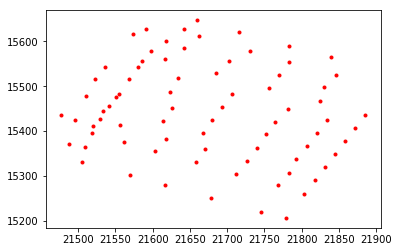

,Node ID,Northing,Easting,WASP
0,28308,21536.348,15542.892,14.8.23.R1-1.2.51-1.0.5 SWAN 37894-C8685F98
1,53855,21585.159,15556.256,14.8.23.R1-1.2.51-1.0.5 SWAN 37894-C8685F98
2,35,21598.113,15578.487,14.8.23.R1-1.2.51-1.0.5 SWAN 37894-C8685F98


In [144]:
df_ml = pd.read_csv('../sml_data/minetec_locations.csv')
plt.plot(df_ml[['Northing']], df_ml[['Easting']], 'r.')
# TODO confirm X and Y are even, square
plt.show()
df_ml.head(3)

**Northings** are simply taken as Y coordinate and **Easting** as X

Below the **LHDMinetecRangeData** is read in, the time is rounded down to a second.

In [135]:
df_rd = pd.DataFrame()
file_type = 'LHDMinetecRangeData' # 38 sec load: 12,092,423
colnames = ['OriginationTime', 'Tag 2 ID', 'Range (cm?)']
# for name in glob.glob(all_dir + file_type + '*'): # all files
for name in [glob.glob(all_dir + file_type + '*')[0]]: # 1 file for testing
    dfx = pd.read_csv(name, usecols=colnames)
    dfx['OriginationTime'] = dfx['OriginationTime'].apply(GPS_parse_date)

    df_rd = df_rd.append(dfx)

df_rd['OriginationTime'] = df_rd['OriginationTime'].values.astype('datetime64[s]')
df_rd = df_rd.rename(columns={'Range (cm?)': 'Rng'})
df_rd.head(3)

,OriginationTime,Tag 2 ID,Rng
0,2016-11-11 06:36:23,36216,2735
1,2016-11-11 06:36:23,42484,2028
2,2016-11-11 06:36:23,57622,6568


Any duplicates are removed (could happen from a time rounding loss of precision) and the values are pivoted.

In [136]:
df_rd = df_rd.drop_duplicates(subset=['OriginationTime', 'Tag 2 ID'])
df_rd = df_rd.pivot(index='OriginationTime', columns='Tag 2 ID')
df_rd.columns = ['{}'.format(num) for col,num in df_rd.columns]

df_rd.head(3)

,35,2630,6820,9858,11386,20719,22002,25169,25190,27021,...,36216,40871,42484,46335,47502,49136,53855,54000,57622,63855
OriginationTime,,,,,,,,,,,,,,,,,,,,,
2016-11-11 06:36:23,NaN,NaN,NaN,NaN,NaN,498,NaN,NaN,5353,NaN,...,2735,NaN,2028,NaN,NaN,NaN,NaN,NaN,6568,NaN
2016-11-11 06:36:24,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,5243,NaN,...,2857,NaN,1890,NaN,NaN,NaN,NaN,NaN,6341,NaN
2016-11-11 06:36:25,NaN,NaN,NaN,NaN,NaN,292,NaN,NaN,5070,NaN,...,3116,NaN,1701,NaN,NaN,NaN,NaN,NaN,6657,NaN


The aim is now to draw the points over time where the loader passes. Then ultimately to _multilaterate_ and just store the X, Y location in the mine to join with other data.

More information on trilateration and multilateration:
- https://github.com/noomrevlis/trilateration
- https://github.com/kamalshadi/Localization
- http://stackoverflow.com/questions/9747227/2d-trilateration
- http://stackoverflow.com/questions/8318113/multilateration-of-gps-coordinates
- https://github.com/mossblaser/NGPS
- http://gis.stackexchange.com/questions/97501/multilateration-code
- http://blog.andersen.im/2012/07/signal-emitter-positioning-using-multilateration/

Attempt below at basic **Tag 2 ID** received over time, next need to redraw graph, and calculate actual location.

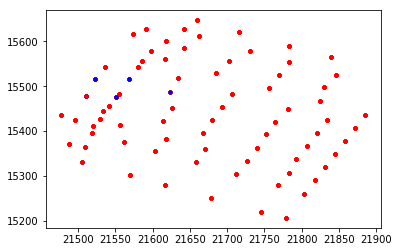

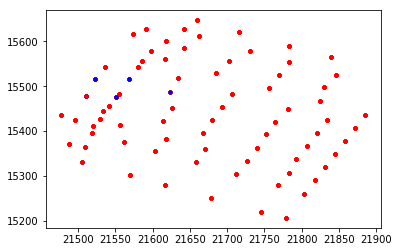

In [247]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

for i in range(1,12):
    record = df_rd.iloc[[i]]
    active_tags = list(filter(None, [None if pd.isnull(record[x][0]) else x for x in record.columns]))
    active_locs = df_ml[df_ml['Node ID'].isin(map(int, active_tags))]

    pl.plot(df_ml[['Northing']], df_ml[['Easting']], 'r.')
    pl.plot(active_locs[['Northing']], active_locs[['Easting']], 'b.')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.1)

# df_rd.head(3)

## TODO

- [ ] load location data (_transpose on same timestamp_)
- [ ] confirm route comparison is ok by location (_roughly on location beacon and distance_)
- [ ] compare similar routes automatically (_as above but work them out automatically, maybe an extra field to group by_)
- [ ] do some further comparison on similar routes
- [ ] find difference in abilities
- [ ] trilatirate a location from the minetech data (_take location data a step further and trilatirate_)